In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9241cb6c-b479-4ab9-8323-79924e192788',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [9]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [21]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11962,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19830246.00000,19830246,False,NaN,1,NaN,NaN,NaN,2025-02-28T07:04:00.000Z,79748.19063,69742609103.68033,-1.68580,-0.53537,-7.58142,-18.97809,-22.33251,-14.86971,-17.54870,1581426238257.69458,60.05020,1674712003240.47998,NaN,2025-02-28T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 12:38:25.100018
1,1027,Ethereum,ETH,ethereum,9953,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120580717.08176,120580717.08176,True,NaN,2,NaN,NaN,NaN,2025-02-28T07:04:00.000Z,2119.93513,31944149635.72841,-0.06850,-0.79413,-9.87576,-23.28166,-32.56369,-38.03372,-42.72455,255623298660.91296,9.69440,255623298660.91000,NaN,2025-02-28T07:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 12:38:25.100018
2,825,Tether USDt,USDT,tether,118002,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142192589364.19644,144564221735.04681,True,NaN,3,NaN,NaN,NaN,2025-02-28T07:04:00.000Z,0.99862,125944395968.89130,-2.02700,-0.00146,-0.04066,-0.15524,-0.11452,0.07936,-0.19274,141996689666.24225,5.39190,144365054623.04001,NaN,2025-02-28T07:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-28 12:38:25.100018
3,52,XRP,XRP,xrp,1542,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57949738512.00000,99986390660,False,NaN,4,NaN,NaN,NaN,2025-02-28T07:05:00.000Z,2.01508,6876998654.81832,-0.30250,-0.65083,-9.38197,-24.47532,-35.24678,-3.01168,5.58880,116773103473.65019,4.42860,201507558915.85001,NaN,2025-02-28T07:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 12:38:25.100018
4,1839,BNB,BNB,bnb,2376,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142476156.19000,142476156.19000,False,NaN,5,NaN,NaN,NaN,2025-02-28T07:05:00.000Z,571.05162,2119613697.33010,1.12950,-0.45994,-7.50762,-12.64546,-15.62457,-18.15853,-13.52697,81361240248.88513,3.08340,81361240248.89000,NaN,2025-02-28T07:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 12:38:25.100018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20658,xcDOT,xcDOT,xcdot,20,2022-06-17T11:12:38.000Z,[moonbeam-ecosystem],NaN,0.00000,1345063.39000,False,NaN,4996,1345063.39000,6115993.21225,NaN,2025-02-28T07:04:00.000Z,4.54699,17482.20177,27.01200,-0.31698,-6.44425,-10.27583,-22.13049,-35.02617,-48.25306,0.00000,0.00000,6115993.21000,NaN,2025-02-28T07:04:00.000Z,6836.00000,Moonbeam,GLMR,moonbeam,0xffffffff1fcacbd218edc0eba20fc2308c778080,2025-02-28 12:38:25.100018
4996,34373,ProtoKOLs,KOL,protokols,3,2024-12-03T05:56:31.000Z,[ethereum-ecosystem],10000000.00000,0.00000,10000000,False,NaN,4997,10000000.00000,2332351.55744,NaN,2025-02-28T07:04:00.000Z,0.23324,17417.76889,17.30160,0.00000,-6.46722,-47.24372,-73.94845,-85.19648,-71.73923,0.00000,0.00000,2332351.56000,NaN,2025-02-28T07:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xd888A5460fFFA4B14340DD9Fe2710cbABd520659,2025-02-28 12:38:25.100018
4997,23050,iinjaz (new),IJZ,iinjaz-new,2,2022-12-23T11:24:39.000Z,[bnb-chain-ecosystem],100000000.00000,0.00000,100000000,False,NaN,4998,20000000.00000,182305.10878,NaN,2025-02-28T07:05:00.000Z,0.00912,17404.54589,11

In [37]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9241cb6c-b479-4ab9-8323-79924e192788',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#Add timestamp for tracking updation
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df   

    if not os.path.isfile(r'C:\Users\praveen\Desktop\Portfolio Projects\CSV files\APIPull.csv'):
        df.to_csv(r'C:\Users\praveen\Desktop\Portfolio Projects\CSV files\APIPull.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\praveen\Desktop\Portfolio Projects\CSV files\APIPull.csv', mode = 'a', header = False)

In [39]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api runner completed')
    sleep(60) #It will run after every 60 sec
exit()

Api runner completed
Api runner completed


KeyboardInterrupt: 

In [35]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11962,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983018e+07,19830175,False,NaN,1,NaN,NaN,NaN,2025-02-28T05:08:00.000Z,7.985388e+04,6.489914e+10,-5.7349,0.051955,-6.401010,-18.693056,-21.926560,-14.316357,-17.497030,1.583516e+12,59.4625,1.676931e+12,NaN,2025-02-28T05:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 10:52:26.693105
1,1027,Ethereum,ETH,ethereum,9953,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205807e+08,120580717.081757,True,NaN,2,NaN,NaN,NaN,2025-02-28T05:09:00.000Z,2.119619e+03,2.928077e+10,-6.2179,-0.426683,-8.549685,-22.872682,-32.281468,-37.462483,-41.869059,2.555852e+11,9.6062,2.555852e+11,NaN,2025-02-28T05:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 10:52:26.693105
2,825,Tether USDt,USDT,tether,117993,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.421926e+11,144564221735.046814,True,NaN,3,NaN,NaN,NaN,2025-02-28T05:08:00.000Z,9.988004e-01,1.219272e+11,-2.6030,-0.035020,-0.008901,-0.144358,-0.087074,0.083354,-0.189015,1.420220e+11,5.3331,1.443908e+11,NaN,2025-02-28T05:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-28 10:52:26.693105
3,52,XRP,XRP,xrp,1542,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,99986390660,False,NaN,4,NaN,NaN,NaN,2025-02-28T05:08:00.000Z,2.030280e+00,6.477252e+09,-4.7535,0.733784,-7.371042,-23.591800,-34.322469,-2.447321,9.821160,1.176542e+11,4.4203,2.030280e+11,NaN,2025-02-28T05:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 10:52:26.693105
4,1839,BNB,BNB,bnb,2376,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424762e+08,142476164.3,False,NaN,5,NaN,NaN,NaN,2025-02-28T05:09:00.000Z,5.727920e+02,2.072630e+09,1.3914,0.158004,-6.373166,-12.196642,-15.414502,-17.707552,-12.700086,8.160921e+10,3.0673,8.160921e+10,NaN,2025-02-28T05:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 10:52:26.693105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21138,PMG Coin,PMG,pmg-coin,2,2022-07-27T05:41:58.000Z,[],2.000000e+09,0.000000e+00,2000000000,False,NaN,4996,NaN,NaN,NaN,2025-02-28T05:47:00.000Z,3.147426e-04,1.745684e+04,1783.6053,0.086293,2.032800,-0.265361,-1.762585,-29.697676,-32.979229,0.000000e+00,0.0000,6.294853e+05,NaN,2025-02-28T05:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:18:46.819370
4996,32309,Bretta (Brett’s Wife),BRETTA,bretta-bretts-wife,2,2024-07-22T03:27:06.000Z,"[memes, solana-ecosystem]",1.000000e+09,0.000000e+00,1000000000,False,NaN,4997,1.000000e+09,2.495341e+05,NaN,2025-02-28T05:47:00.000Z,2.495341e-04,1.741725e+04,-49.4714,4.077437,-24.546237,45.531334,162.816022,153.826558,179.737797,0.000000e+00,0.0000,2.495341e+05,NaN,2025-02-28T05:47:00.000Z,5426.0,Solana,SOL,solana,DXBYAw9aQheMdujaLZYnVSpKSK4n8jMS7HfLbiv5RWnS,2025-02-28 11:18:46.819370
4997,9848,Moonlight Token,MOONLIGHT,moonlight-token,13,2021-05-16T00:00:00.000Z,[bnb-chain-ecosystem],1.000000e+15,0.000000e+00,1000000000000000,False,NaN,4999,1.000000e+15,1.843386e+07,NaN,2025-02-28T05:47:00.000Z,1.843386e-08,1.739912e+04,-12.2696,-0.011628,-5.633616,-14.307852,-29.239402,-22.483871,29.339023,0.000000e+00,0

In [11]:
df3 = pd.read_csv(r'C:\Users\praveen\Desktop\Portfolio Projects\CSV files\APIPull.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11962,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983022e+07,1.983022e+07,False,NaN,1,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,8.014461e+04,6.804775e+10,-1.9115,-0.257609,-6.611047,-18.502903,-21.635379,-14.179679,-17.487300,1.589285e+12,60.1945,1.683037e+12,NaN,2025-02-28T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
1,1,1027,Ethereum,ETH,ethereum,9953,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205807e+08,1.205807e+08,True,NaN,2,NaN,NaN,NaN,2025-02-28T06:04:00.000Z,2.136905e+03,2.987769e+10,-5.3845,-0.009098,-8.645480,-22.493640,-31.768506,-37.227832,-42.189269,2.576695e+11,9.7797,2.576695e+11,NaN,2025-02-28T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
2,2,825,Tether USDt,USDT,tether,117994,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.421926e+11,1.445642e+11,True,NaN,3,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,9.987554e-01,1.233685e+11,-2.9918,-0.009457,-0.035182,-0.146235,-0.093860,0.103833,-0.174643,1.420156e+11,5.3789,1.443843e+11,NaN,2025-02-28T06:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-28 11:35:04.906214
3,3,52,XRP,XRP,xrp,1542,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,4,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,2.024923e+00,6.653825e+09,-2.4772,-0.622918,-8.538159,-23.546581,-35.082126,-2.028013,7.988115,1.173438e+11,4.4381,2.024923e+11,NaN,2025-02-28T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
4,4,1839,BNB,BNB,bnb,2376,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424762e+08,1.424762e+08,False,NaN,5,NaN,NaN,NaN,2025-02-28T06:04:00.000Z,5.740004e+02,2.095156e+09,0.9781,-0.198168,-6.706060,-11.935797,-15.143031,-17.693835,-12.854698,8.178137e+10,3.1040,8.178137e+10,NaN,2025-02-28T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4995,9191,Occam.Fi,OCC,occamfi,20,2021-04-09T00:00:00.000Z,"['ethereum-ecosystem', 'cardano-ecosystem', 'c...",NaN,0.000000e+00,9.950000e+07,False,NaN,4996,2.499166e+07,1.088046e+06,NaN,2025-02-28T06:05:00.000Z,4.353636e-02,1.750645e+04,-63.0309,-1.678163,-5.358197,-21.565098,-28.726959,-52.239261,-59.342933,0.000000e+00,0.0000,4.331868e+06,NaN,2025-02-28T06:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2f109021afe75b949429fe30523ee7c0d5b27207,2025-02-28 11:36:09.672691
9996,4996,34227,Coby,COBY,coby,8,2024-11-26T07:48:21.000Z,"['memes', 'solana-ecosystem']",1.000000e+09,0.000000e+00,9.996332e+08,False,NaN,4997,9.996441e+08,3.885432e+05,NaN,2025-02-28T06:05:00.000Z,3.886816e-04,1.747385e+04,211.1098,-0.525968,-13.733064,-31.603629,-78.380992,-88.683161,-93.300027,0.000000e+00,0.0000,3.886816e+05,NaN,2025-02-28T06:05:00.000Z,5426.0,Solana,SOL,solana,8WnQQRbuEZ3CCDbH5MCVioBbw6o75NKANq9WdPhBDsWo,2025-02-28 11:36:09.672691
9997,4997,34373,ProtoKOLs,KOL,protokols,3,2024-12-03T05:56:31.000Z,['ethereum-ecosystem'],1.000000e+07,0.000000e+00,1.000000e+07,False,NaN,4998,1.000000e+07,2.332352e+06,NaN,2025-02-28T06:04:00.000Z,2.3323

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [46]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11962,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19830221.00000,19830221.00000,False,NaN,1,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,80144.61165,68047748872.62381,-1.91150,-0.25761,-6.61105,-18.50290,-21.63538,-14.17968,-17.48730,1589285361030.52856,60.19450,1683036844704.90991,NaN,2025-02-28T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
1,1,1027,Ethereum,ETH,ethereum,9953,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120580717.08176,120580717.08176,True,NaN,2,NaN,NaN,NaN,2025-02-28T06:04:00.000Z,2136.90488,29877692469.75300,-5.38450,-0.00910,-8.64548,-22.49364,-31.76851,-37.22783,-42.18927,257669522340.80627,9.77970,257669522340.81000,NaN,2025-02-28T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
2,2,825,Tether USDt,USDT,tether,117994,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142192589364.19644,144564221735.04681,True,NaN,3,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,0.99876,123368462600.27763,-2.99180,-0.00946,-0.03518,-0.14624,-0.09386,0.10383,-0.17464,142015619234.93591,5.37890,144384299918.29999,NaN,2025-02-28T06:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-28 11:35:04.906214
3,3,52,XRP,XRP,xrp,1542,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57949738512.00000,99986390660.00000,False,NaN,4,NaN,NaN,NaN,2025-02-28T06:03:00.000Z,2.02492,6653825281.65808,-2.47720,-0.62292,-8.53816,-23.54658,-35.08213,-2.02801,7.98812,117343750736.58849,4.43810,202492286850.07999,NaN,2025-02-28T06:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
4,4,1839,BNB,BNB,bnb,2376,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142476160.60000,142476160.60000,False,NaN,5,NaN,NaN,NaN,2025-02-28T06:04:00.000Z,574.00040,2095156280.10991,0.97810,-0.19817,-6.70606,-11.93580,-15.14303,-17.69383,-12.85470,81781373126.34714,3.10400,81781373126.35001,NaN,2025-02-28T06:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-28 11:35:04.906214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4995,9191,Occam.Fi,OCC,occamfi,20,2021-04-09T00:00:00.000Z,"['ethereum-ecosystem', 'cardano-ecosystem', 'c...",NaN,0.00000,99500000.00000,False,NaN,4996,24991659.51000,1088045.94868,NaN,2025-02-28T06:05:00.000Z,0.04354,17506.45217,-63.03090,-1.67816,-5.35820,-21.56510,-28.72696,-52.23926,-59.34293,0.00000,0.00000,4331868.07000,NaN,2025-02-28T06:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2f109021afe75b949429fe30523ee7c0d5b27207,2025-02-28 11:36:09.672691
9996,4996,34227,Coby,COBY,coby,8,2024-11-26T07:48:21.000Z,"['memes', 'solana-ecosystem']",1000000000.00000,0.00000,999633181.40459,False,NaN,4997,999644123.61883,388543.23247,NaN,2025-02-28T06:05:00.000Z,0.00039,17473.84617,211.10980,-0.52597,-13.73306,-31.60363,-78.38099,-88.68316,-93.30003,0.00000,0.00000,388681.56000,NaN,2025-02-28T06:05:00.000Z,5426.00000,Solana,SOL,solana,8WnQQRbuEZ3CCDbH5MCVioBbw6o75NKANq9WdPhBDsWo,2025-02-28 11:36:09.672691
9997,4997,34373,ProtoKOLs,KOL,protokols,3,2024-12-03T05:56:31.000Z,['ethereum-ecosystem'],10000000.00000,0.00000,10000000.0

In [48]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only = True)
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.23498,-6.58682,-18.48943,-21.61927,-14.16814,-17.44576
Ethereum,0.04929,-8.69133,-22.55120,-31.78420,-37.25737,-42.24850
Tether USDt,-0.01759,-0.04061,-0.15296,-0.10346,0.09431,-0.17949
XRP,-0.58971,-8.45331,-23.48410,-35.01305,-1.95961,8.06934
BNB,-0.20091,-6.72484,-11.96639,-15.16193,-17.71983,-12.90106
...,...,...,...,...,...,...
Occam.Fi,-1.54928,-5.22959,-21.45891,-28.62927,-52.17444,-59.28776
Coby,-0.52597,-13.73306,-30.05083,-78.38099,-88.62776,-93.30003
ProtoKOLs,0.24162,-6.46722,-48.07771,-73.70614,-85.30713,-71.73923


In [50]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.23498
              quote.USD.percent_change_24h    -6.58682
              quote.USD.percent_change_7d    -18.48943
              quote.USD.percent_change_30d   -21.61927
              quote.USD.percent_change_60d   -14.16814
                                                ...   
iinjaz (new)  quote.USD.percent_change_24h    -0.00227
              quote.USD.percent_change_7d     -0.15325
              quote.USD.percent_change_30d     0.20208
              quote.USD.percent_change_60d    -0.07518
              quote.USD.percent_change_90d    -8.95631
Length: 29814, dtype: float64

In [52]:
#df5 datatype is series. Convert to dataframe
df5 = df5.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.23498
             quote.USD.percent_change_24h  -6.58682
             quote.USD.percent_change_7d  -18.48943
             quote.USD.percent_change_30d -21.61927
             quote.USD.percent_change_60d -14.16814
...                                             ...
iinjaz (new) quote.USD.percent_change_24h  -0.00227
             quote.USD.percent_change_7d   -0.15325
             quote.USD.percent_change_30d   0.20208
             quote.USD.percent_change_60d  -0.07518
             quote.USD.percent_change_90d  -8.95631

[29814 rows x 1 columns]

In [54]:
type(df5)

pandas.core.frame.DataFrame

In [56]:
df5 = df5.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23498
1,Bitcoin,quote.USD.percent_change_24h,-6.58682
2,Bitcoin,quote.USD.percent_change_7d,-18.48943
3,Bitcoin,quote.USD.percent_change_30d,-21.61927
4,Bitcoin,quote.USD.percent_change_60d,-14.16814
...,...,...,...
29809,iinjaz (new),quote.USD.percent_change_24h,-0.00227
29810,iinjaz (new),quote.USD.percent_change_7d,-0.15325
29811,iinjaz (new),quote.USD.percent_change_30d,0.20208
29812,iinjaz (new),quote.USD.percent_change_60d,-0.07518


In [75]:
df5 = df5.rename(columns = {'level_1': 'percent_change'})
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,-0.23498
1,Bitcoin,24h,-6.58682
2,Bitcoin,7d,-18.48943
3,Bitcoin,30d,-21.61927
4,Bitcoin,60d,-14.16814
...,...,...,...
29809,iinjaz (new),24h,-0.00227
29810,iinjaz (new),7d,-0.15325
29811,iinjaz (new),30d,0.20208
29812,iinjaz (new),60d,-0.07518


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.catplot(x='percent_change', y='values', hue = 'name', data=df5, kind= 'point')

plt.figure(figsize=(30, 8))
plt.legend(loc="upper right")
plt.savefig("output.png", bbox_inches="tight")

In [45]:
df6 = df3[['name', 'quote.USD.price', 'timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,80144.61165,2025-02-28 11:35:04.906214
5000,Bitcoin,80177.43553,2025-02-28 11:36:09.672691


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

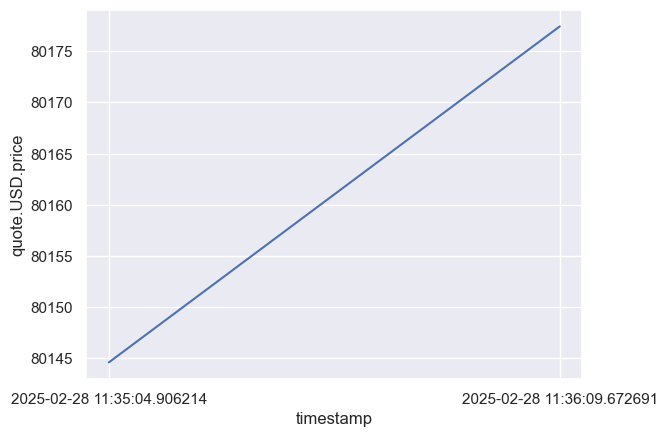

In [47]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df6)